In [1]:
# install the following package
#!pip install  torch numpy scikit-learn h5py PyWavelets

# Step 1: loading mat file
import numpy as np
import h5py
from bcgunet import bcgunet
import glob
from os.path import *

ffs = glob.glob(r"./data/noscan/*/analysis/eyeclose_*.mat")
result_obs = []
result_unet = []
result_eeg = []
for close_f in ffs:
    open_f = close_f.replace("close", "open")

    if not isfile(open_f):
        continue

    f = h5py.File(close_f, "r")
    ECG = np.array(f["ECG"]).flatten()
    EEG = np.array(f["EEG_before_bcg"]).T
    EEG_OBS = np.array(f["EEG"]).T
    EEG_unet = bcgunet.run(EEG, ECG)
    psd_obs_close = bcgunet.get_psd(EEG_OBS[:, ::10], sfreq=500)
    psd_unet_close = bcgunet.get_psd(EEG_unet[:, ::10], sfreq=500)
    psd_eeg_close = bcgunet.get_psd(EEG[:, ::10], sfreq=500)

    f = h5py.File(open_f, "r")
    ECG = np.array(f["ECG"]).flatten()
    EEG = np.array(f["EEG_before_bcg"]).T
    EEG_OBS = np.array(f["EEG"]).T
    EEG_unet = bcgunet.run(EEG, ECG)
    psd_obs_open = bcgunet.get_psd(EEG_OBS[:, ::10], sfreq=500)
    psd_unet_open = bcgunet.get_psd(EEG_unet[:, ::10], sfreq=500)
    psd_eeg_open = bcgunet.get_psd(EEG[:, ::10], sfreq=500)

    result_obs.append(psd_obs_close / psd_obs_open)
    result_unet.append(psd_unet_close / psd_unet_open)
    result_eeg.append(psd_eeg_close / psd_eeg_open)

/Users/jacoblincool/Documents/GitHub/BCGunet/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/31 [00:00<?, ?it/s]/Users/jacoblincool/Documents/GitHub/BCGunet/.venv/lib/python3.10/site-packages/pywt/_functions.py:185: RuntimeWarning: divide by zero encountered in divide
  return central_frequency(wavelet, precision=precision) / scale
100%|██████████| 31/31 [00:00<00:00, 39.87it/s]


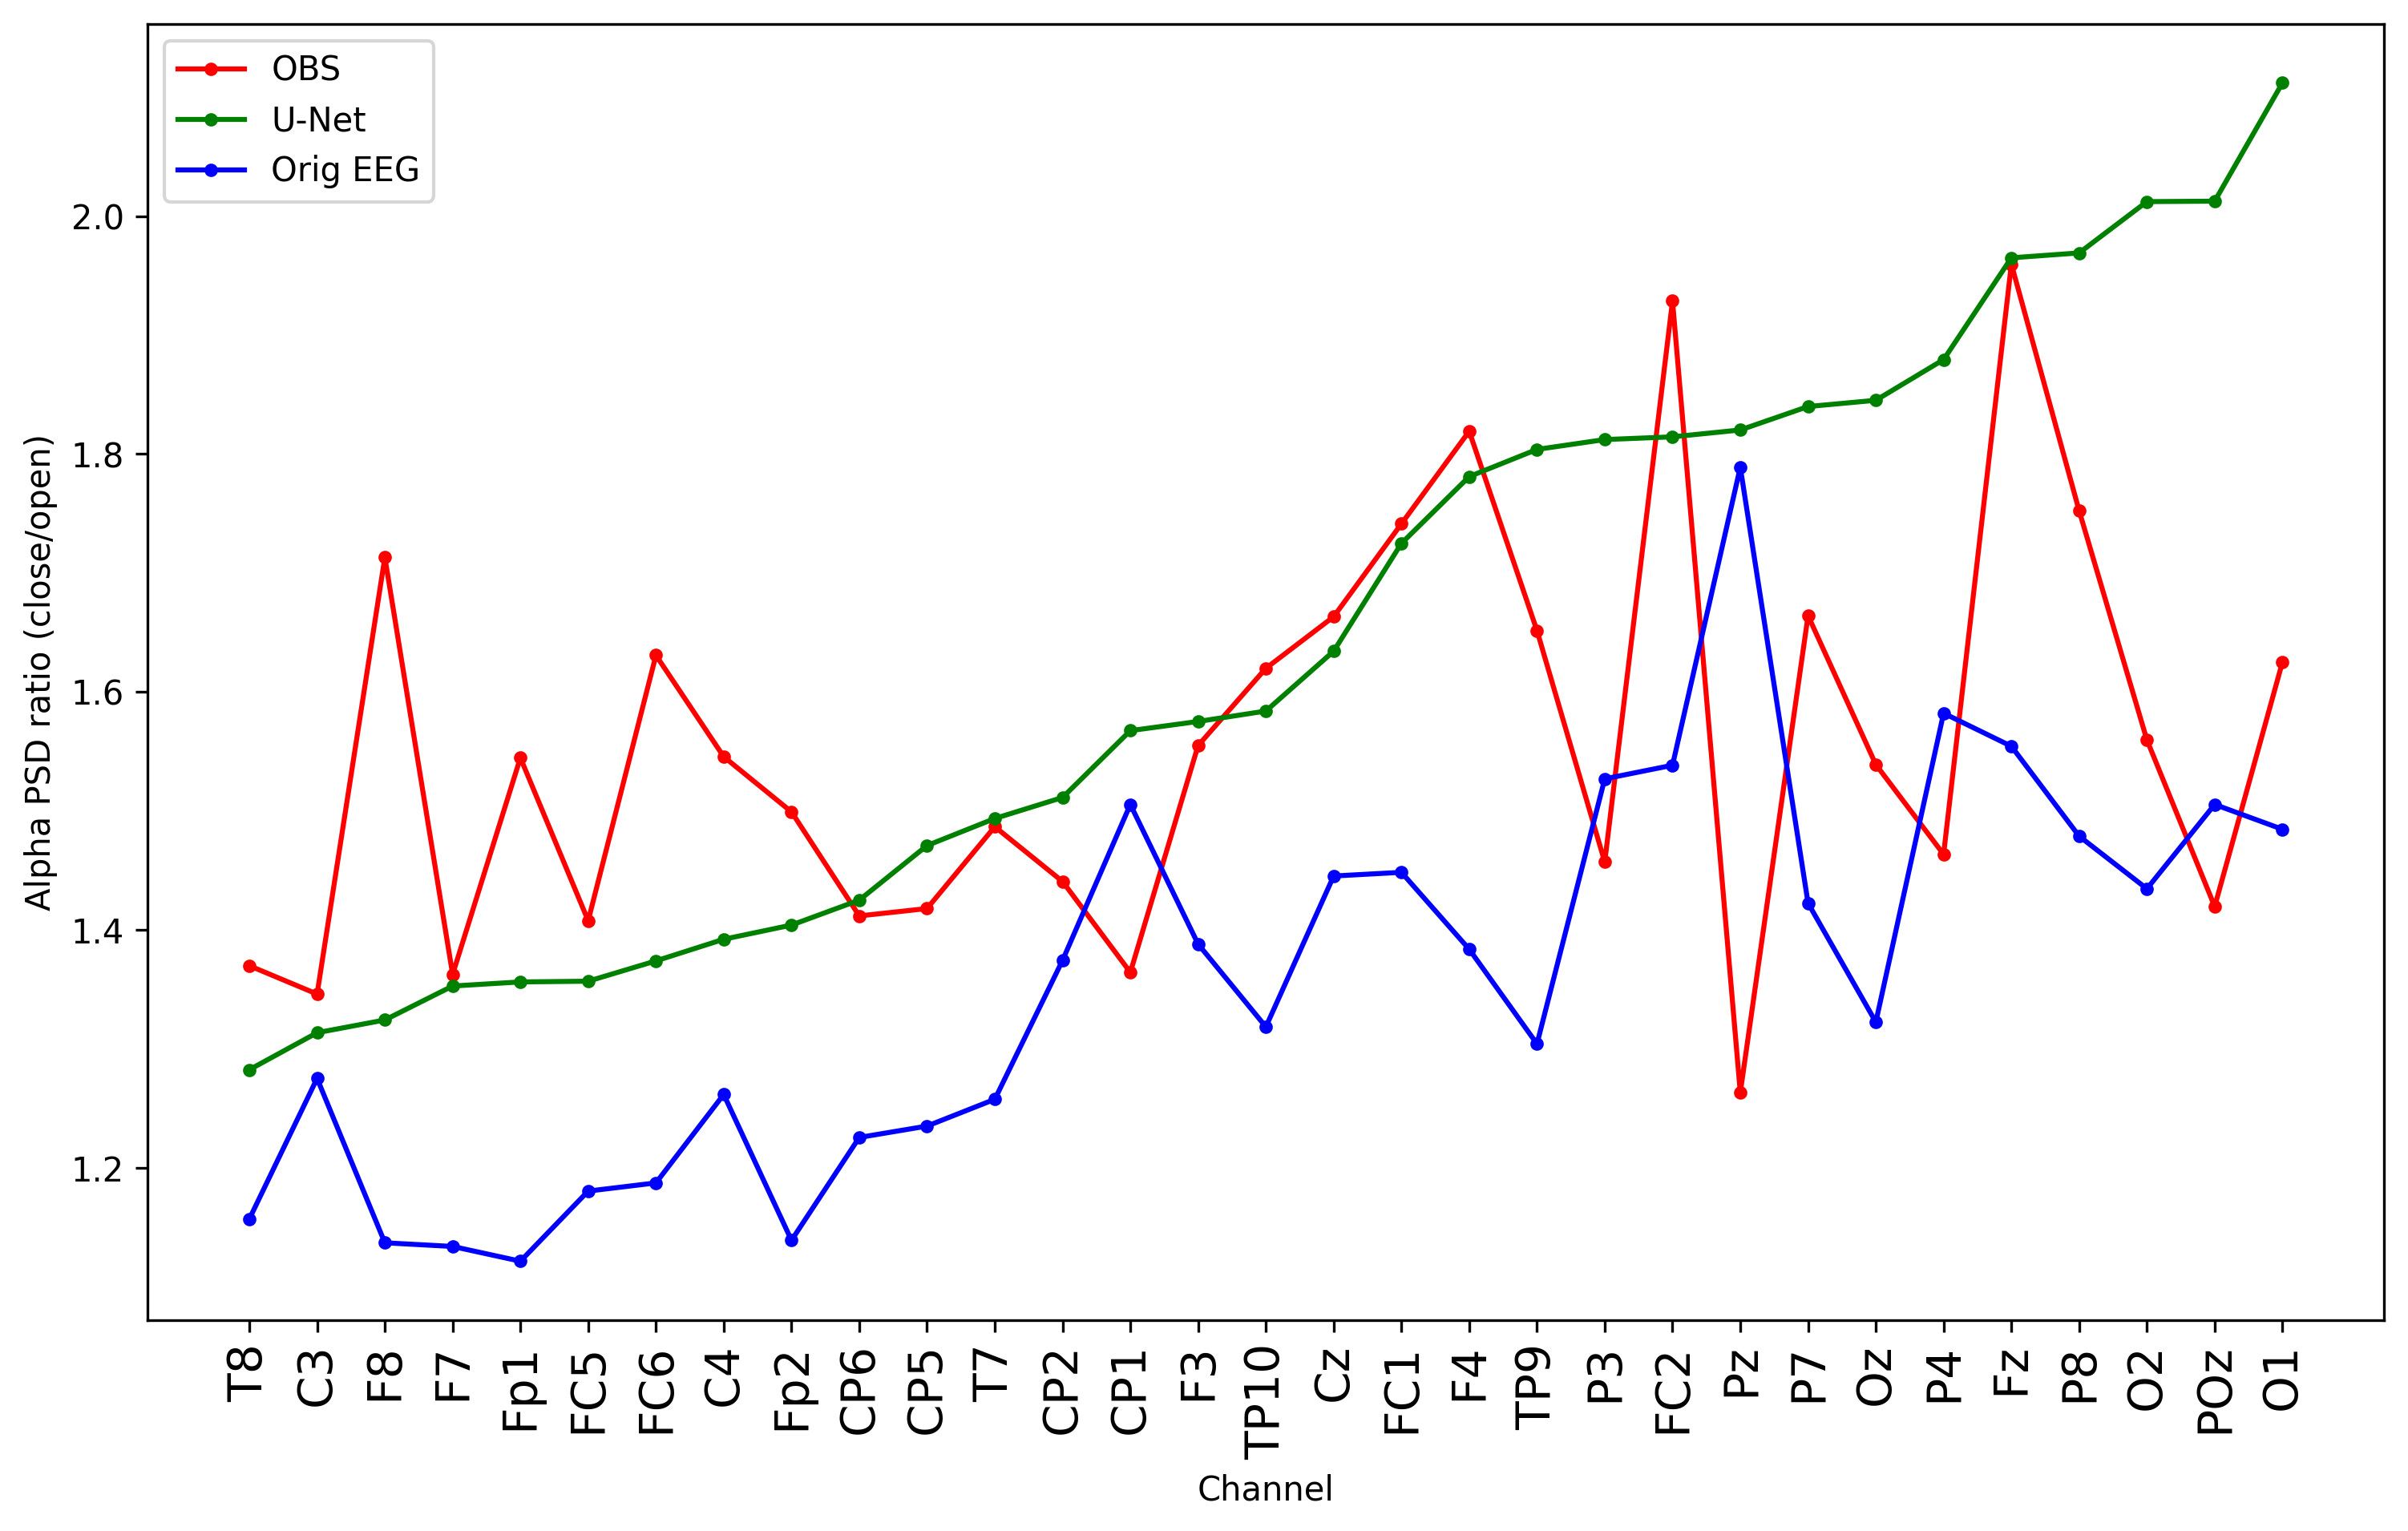

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7), dpi=300)
indx = np.argsort(np.mean(result_unet, axis=0).flatten())

plt.plot(np.mean(result_obs, axis=0)[indx], "r.-", label="OBS")
plt.plot(np.mean(result_unet, axis=0)[indx], "g.-", label="U-Net")
plt.plot(np.mean(result_eeg, axis=0)[indx], "b.-", label="Orig EEG")

label = [
    "Fp1",
    "Fp2",
    "F3",
    "F4",
    "C3",
    "C4",
    "P3",
    "P4",
    "O1",
    "O2",
    "F7",
    "F8",
    "T7",
    "T8",
    "P7",
    "P8",
    "Fz",
    "Cz",
    "Pz",
    "Oz",
    "FC1",
    "FC2",
    "CP1",
    "CP2",
    "FC5",
    "FC6",
    "CP5",
    "CP6",
    "TP9",
    "TP10",
    "POz",
]
label = [label[ii] for ii in indx]
plt.xlabel("Channel")
plt.ylabel("Alpha PSD ratio (close/open)")
plt.xticks(np.arange(31), label, fontsize=14, rotation=90)

plt.legend()